In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# funciones desarrolladas
from functions.cargar_data import *
from functions.modelos import *
from functions.graficas import plot_gt

In [6]:
# carga datos diádicos
dd_deptos = cargar_dd_deptos()
print(dd_deptos.columns)
dd_deptos.head(2)

Index(['cod', 'depto_origen', 'depto_destino', 'personas_mig',
       'personas_mig_18_25', 'personas_mig_26_35', 'personas_mig_100k',
       'pob_origen', 'pob_destino', 'dist', 'dist_km', 'pbi_origen',
       'pbi_porcen_ori', 'pbi_destino', 'pbi_porcen_des',
       'pbi_origen_millardos', 'pbi_destino_millardos', 'largo_limite',
       'dummy_limit', 'empresas_origen', 'empresas_destino',
       'menores_25_origen', 'menores_25_destino', 'pob_destino_k',
       'pob_origen_k', 'nom_depto_orig', 'nom_depto_des', 'edad_prom_ori',
       'porc_ocupados_ori', 'edad_prom_des', 'porc_ocupados_des',
       'log_pbi_destino', 'log_dist_km', 'log_pbi_origen_millardos',
       'log_pbi_destino_millardos', 'log_pob_destino_k', 'log_pob_origen_k',
       'log_edad_prom_des', 'log_porc_ocupados_des', 'largo_limite_km'],
      dtype='object')


,cod,depto_origen,depto_destino,personas_mig,personas_mig_18_25,personas_mig_26_35,personas_mig_100k,pob_origen,pob_destino,dist,...,porc_ocupados_des,log_pbi_destino,log_dist_km,log_pbi_origen_millardos,log_pbi_destino_millardos,log_pob_destino_k,log_pob_origen_k,log_edad_prom_des,log_porc_ocupados_des,largo_limite_km
0,102,1,2,914,114,247,891,1318755,73377,610726,...,63.540489,16.469807,6.415097,6.143859,2.654298,4.295611,7.184443,3.525387,4.151677,1.000000e-07
1,302,3,2,74,9,22,70,520173,73377,601915,...,63.540489,16.469807,6.400257,4.457899,2.654298,4.295611,6.254161,3.525387,4.151677,1.000000e-07


## 1. Modelos con Montevideo

### 1.1. **Restringido en origen con variables independientes:**

- Dummy de límites

- Largo límite (km)

- PBI en destino (millardos)

- Distancia entre centros medios de población (km)

Devuelve un R-cuadrado superior a las demás combinaciones de variables independientes.

In [7]:
# define el string tomado como fórmula
formula = """
personas_mig ~ nom_depto_orig + dummy_limit + menores_25_destino
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

# entrena y ajusta el modelo
f = sm.families.Poisson()
prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  342
Model:                            GLM   Df Residuals:                      318
Model Family:                 Poisson   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14309.
Date:                Thu, 27 Jan 2022   Deviance:                       26391.
Time:                        11:12:00   Pearson chi2:                 3.77e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.9152      0.023    211.373      0.000       4.870       4.961
nom_depto_orig[T.CANELONES]          0.2704      0.019     13.963      0.000       0.232       0.308
nom_depto_orig[T.CERRO LARGO]       -0.4150      0.021    -19.899      0.000      -0.456      -0.374
nom_depto_orig[T.COLONIA]           -0.4364      0.022    -19.772      0.000      -0.480      -0.393
nom_depto_orig[T.DURAZNO]           -0.8308      0.023    -36.383      0.000      -0.876      -0.786
nom_depto_orig[T.FLORES]            -1.6173      0.030    -53.695      0.000      -1.676      -1.558
nom_depto_orig[T.FLORIDA]           -0.9475      0.023    -41.300      0.000      -0.993      -0.903
nom_depto_orig[T.LAVALLEJA]         -1.0098      0.024    -42.784      0.000      -1.056      -0.964
nom_depto_orig[T.MALDONADO]         -0.3784      0.021    -17.779      0.000      -0.420      -0.337
nom_depto_orig[T.MONTEVIDEO]         2.4265      0.018    134.793      0.000       2.391       2.462
nom_depto_orig[T.PAYSANDU]          -0.3569      0.020    -17.466      0.000      -0.397      -0.317
nom_depto_orig[T.RIO NEGRO]         -0.8288      0.023    -36.113      0.000      -0.874      -0.784
nom_depto_orig[T.RIVERA]            -0.2279      0.020    -11.284      0.000      -0.268      -0.188
nom_depto_orig[T.ROCHA]             -0.6888      0.023    -29.862      0.000      -0.734      -0.644
nom_depto_orig[T.SALTO]             -0.2176      0.020    -11.044      0.000      -0.256      -0.179
nom_depto_orig[T.SAN JOSE]          -1.0914      0.024    -45.880      0.000      -1.138      -1.045
nom_depto_orig[T.SORIANO]           -0.4388      0.021    -20.464      0.000      -0.481      -0.397
nom_depto_orig[T.TACUAREMBO]        -0.3544      0.020    -17.852      0.000      -0.393      -0.316
nom_depto_orig[T.TREINTA Y TRES]    -0.8619      0.023    -36.791      0.000      -0.908      -0.816
dummy_limit[T.True]                  0.5516      0.012     45.640      0.000       0.528       0.575
menores_25_destino                1.351e-05   7.55e-08    178.973      0.000    1.34e-05    1.37e-05
largo_limite_km                      0.0050   9.08e-05     55.015      0.000       0.005       0.005
pbi_destino_millardos               -0.0058    7.3e-05    -79.236      0.000      -0.006      -0.006
dist_km                             -0.0012   3.18e-05    -38.575      0.000      -0.001      -0.001
====================================================================================================
"""

$R²$ = 0.9832

RMSE = 252.2639

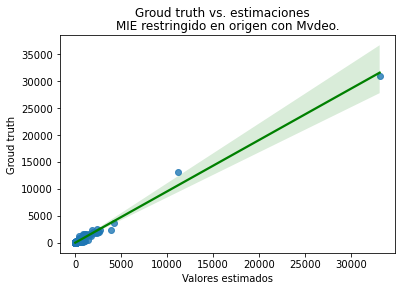

In [8]:
actual_counts = dd_deptos.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

In [13]:
# matriz de los valores estimados
dd_deptos['prodsimest'] = np.round(predicted_counts)

pd.pivot_table(dd_deptos,
values='prodsimest',
index ='depto_origen',
columns='depto_destino',
fill_value=0,
aggfunc=sum,
margins=True,
margins_name='Total')

depto_destino,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Total
depto_origen,,,,,,,,,,,,,,,,,,,,
1,0,1020,30993,1353,1733,1523,1337,1718,1584,2305,1569,1234,1335,1424,1516,3752,1511,1447,1301,58655.0
2,2065,0,574,118,96,99,85,89,80,106,150,101,177,80,903,100,106,145,91,5165.0
3,13051,119,0,161,196,178,156,562,421,530,183,143,156,169,177,529,175,169,155,17230.0
4,1780,76,503,0,70,221,64,75,78,105,83,58,255,83,95,80,68,280,483,4457.0
5,2284,62,615,70,0,87,144,88,76,106,103,84,77,68,100,273,367,84,64,4752.0
6,1492,48,415,165,65,0,161,278,56,75,69,159,63,52,69,71,63,353,104,3758.0
7,694,22,193,25,57,85,0,66,24,34,34,46,28,22,33,85,98,30,23,1599.0
8,1495,38,1162,50,58,247,111,0,169,75,58,44,50,49,56,171,52,54,103,4042.0
9,1351,34,852,51,49,49,40,166,0,288,47,36,45,129,46,59,44,47,161,3494.0


In [14]:
prodSim.save("modelos/restringido_origen_mvo.pickle")

### 1.2. **Restringido en origen pero prediciendo migrantes de 18 a 24 años**

In [ ]:
formula = """
personas_mig_18_25 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_18_25
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

### 1.3. **Restringido en origen pero prediciendo migrantes de 26 a 35**

In [ ]:
formula = """
personas_mig_26_35 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_26_35
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

## 2. Modelos sin Montevideo

### 2.1. **Restringido en origen con mismas var. indep. pero sin Montevideo**


In [7]:
dd_deptos_no_mvo = dd_deptos.loc[(dd_deptos.depto_origen!=1) & (dd_deptos.depto_destino!=1)]

formula = """
personas_mig ~ nom_depto_orig + dummy_limit + menores_25_destino
+ largo_limite_km + pbi_destino_millardos + dist_km -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos_no_mvo, family=f).fit()

prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  306
Model:                            GLM   Df Residuals:                      283
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5201.1
Date:                Sat, 28 Aug 2021   Deviance:                       8508.3
Time:                        18:32:54   Pearson chi2:                 9.06e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]            4.3712      0.037    119.286      0.000       4.299       4.443
nom_depto_orig[CANELONES]          4.9542      0.024    203.689      0.000       4.907       5.002
nom_depto_orig[CERRO LARGO]        4.0672      0.033    125.005      0.000       4.003       4.131
nom_depto_orig[COLONIA]            3.8274      0.030    127.495      0.000       3.769       3.886
nom_depto_orig[DURAZNO]            3.5193      0.031    113.525      0.000       3.459       3.580
nom_depto_orig[FLORES]             2.7344      0.040     69.081      0.000       2.657       2.812
nom_depto_orig[FLORIDA]            3.5636      0.030    120.156      0.000       3.505       3.622
nom_depto_orig[LAVALLEJA]          3.3095      0.033    101.736      0.000       3.246       3.373
nom_depto_orig[MALDONADO]          4.2745      0.028    152.135      0.000       4.219       4.330
nom_depto_orig[PAYSANDU]           3.9241      0.031    127.455      0.000       3.864       3.984
nom_depto_orig[RIO NEGRO]          3.5916      0.032    113.109      0.000       3.529       3.654
nom_depto_orig[RIVERA]             4.0927      0.035    117.156      0.000       4.024       4.161
nom_depto_orig[ROCHA]              3.6254      0.034    107.821      0.000       3.560       3.691
nom_depto_orig[SALTO]              4.0677      0.033    121.705      0.000       4.002       4.133
nom_depto_orig[SAN JOSE]           3.6143      0.030    119.838      0.000       3.555       3.673
nom_depto_orig[SORIANO]            3.7361      0.030    122.982      0.000       3.677       3.796
nom_depto_orig[TACUAREMBO]         3.9477      0.032    123.022      0.000       3.885       4.011
nom_depto_orig[TREINTA Y TRES]     3.7254      0.032    117.016      0.000       3.663       3.788
dummy_limit[T.True]                0.1915      0.019     10.284      0.000       0.155       0.228
menores_25_destino             -1.158e-05   2.27e-07    -50.982      0.000    -1.2e-05   -1.11e-05
largo_limite_km                    0.0075      0.000     60.603      0.000       0.007       0.008
pbi_destino_millardos              0.0573      0.001    101.023      0.000       0.056       0.058
dist_km                           -0.0016   5.95e-05    -26.722      0.000      -0.002      -0.001
==================================================================================================
"""

$R²$ = 0.8343

RMSE = 83.5727

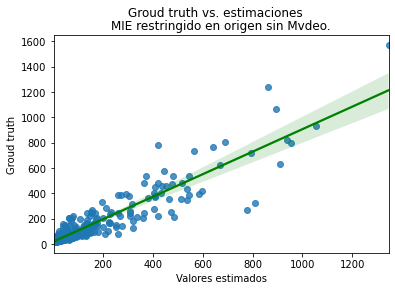

In [8]:
actual_counts = dd_deptos_no_mvo.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)


subtitle = 'MIE restringido en origen sin Mvdeo.'
plot_gt(actual_counts, predicted_counts, title, subtitle)

In [ ]:
prodSim.save("modelos/restringido_origen_noMVO.pickle")